In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# The Data given represents annual sales on Hollywood movie industry and their equivalent prices as per inflation in 2021.

In [127]:
p = os.getcwd()
path = os.path.join(p, "Dataset", "AnnualTicketSales.csv") # Path is set so that file could be read in all OS without issue

In [128]:
df = pd.read_csv(path)

In [129]:
df.head() # Example of our data

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,AVERAGE TICKET PRICE INFLATION ADJUSTED
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912.00",$9.16,$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,206,766,899.44",$9.16,$9.87
2,2019,"1,22,85,41,629","$11,253,443,955","$12,272,234,601.60",$9.16,$9.99
3,2018,"1,31,15,36,128","$11,948,096,650","$13,265,871,689.01",$9.11,$10.11
4,2017,"1,22,56,39,761","$10,993,991,460","$12,504,678,553.49",$8.97,$10.20


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   YEAR                                     27 non-null     int64 
 1   TICKETS SOLD                             27 non-null     object
 2   TOTAL BOX OFFICE                         27 non-null     object
 3   TOTAL INFLATION ADJUSTED BOX OFFICE      27 non-null     object
 4   AVERAGE TICKET PRICE                     27 non-null     object
 5   AVERAGE TICKET PRICE INFLATION ADJUSTED  27 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


Convert Data to Numerics for quick processing  [RUN ONCE]

In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #set option to display float nummber without Exponentials

for i in df:
    if i != 'YEAR':
        df[i] = df[i].str.replace("[,$]",'').astype(float) #remove symbols and convert values to float

C:\Users\ACER\AppData\Local\Temp\ipykernel_10420\1908423967.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace("[,$]",'').astype(float) #remove symbols and convert values to float


In [169]:
df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,AVERAGE TICKET PRICE INFLATION ADJUSTED
0,2021,423774881.00,3881777912.00,3881777912.00,9.16,9.16
1,2020,223638958.00,2048534616.00,2206766899.44,9.16,9.87
2,2019,1228541629.00,11253443955.00,12272234601.60,9.16,9.99
3,2018,1311536128.00,11948096650.00,13265871689.01,9.11,10.11
4,2017,1225639761.00,10993991460.00,12504678553.49,8.97,10.20


# BASIC QUESTIONS

Which year sold the most amount of tickets?

In [179]:
print("YEAR : ",df.iloc[df['TICKETS SOLD'].idxmax()]['YEAR'].astype(int)) #get the year
print("TICKETS SOLD : ",df['TICKETS SOLD'].max().astype(int)) #get tickets sold that year
print("NET WORTH ON BOX OFFICE : ",df.iloc[df['TICKETS SOLD'].idxmax()]['TOTAL INFLATION ADJUSTED BOX OFFICE'])

YEAR :  2002
TICKETS SOLD :  1575756527
NET WORTH ON BOX OFFICE :  14188289904.59


What is the inflation percentage in 2002? 

In [307]:
#this code snippet allowes to directly check inflation of any given year 

inflation_year = int(input("Enter YEAR "))

later_cpi = df[df['YEAR']==inflation_year]['TOTAL INFLATION ADJUSTED BOX OFFICE']
earlier_cpi = df[df['YEAR']==inflation_year]['TOTAL BOX OFFICE'] 
result = ((later_cpi - earlier_cpi)/earlier_cpi)*100 #equation to find inflation rate

print(f"Inflation percentage of {inflation_year} : ", np.round(result.values),"%") 

Enter YEAR 2002
Inflation percentage of 2002 :  [55.] %


Has 2017 ticket prices effected its Sales?

      #compare Sales with previous year and next year
      #compare with lowest priced ticket year sales and 2017 sales


In [303]:
#this code snippet allowes to directly compare 2017 with any other year 
#(can be used to quickly check diffrence or embedded into an interactive component)

comparing_year = int(input("Enter YEAR "))

year_2017_sales = df.loc[df['YEAR']==2017, 'TOTAL INFLATION ADJUSTED BOX OFFICE'].iloc[0]
other_year_sales = df.loc[df['YEAR']==comparing_year, 'TOTAL INFLATION ADJUSTED BOX OFFICE'].iloc[0]

if year_2017_sales > other_year_sales:
    print(f"2017 Sales was Better than {comparing_year} \n")
    print(f"2017 : {year_2017_sales} \n{comparing_year} : {other_year_sales} \n difference : {int(year_2017_sales-other_year_sales)} Higher sales")
else:
    print(f"2017 Sales was not as good as {comparing_year} \n")
    print(f"2017 : {year_2017_sales} \n{comparing_year} : {other_year_sales} \n difference : {int(other_year_sales-year_2017_sales)} Lower sales")

Enter YEAR 1996
2017 Sales was Better than 1996 

2017 : 12504678553.49 
1996 : 10251311227.37 
 difference : 2253367326 Higher sales


In [306]:
cheapest_ticket_sales = df.loc[df['AVERAGE TICKET PRICE INFLATION ADJUSTED'].idxmin()].iloc[3]
cheapest_ticket_year = df.loc[df['AVERAGE TICKET PRICE INFLATION ADJUSTED'].idxmin()].iloc[0]

print("Sales : ",cheapest_ticket_sales)
print("YEAR : ",cheapest_ticket_year)

#COPY PASTE YEAR (from result of this code) WHILE RUNNING ABOVE SNIPET TO SEE DIFFRENCE COMPARED TO 2017

Sales :  10251311227.37
YEAR :  1996.0


# VISUALISATION QUESTIONS

How does Sales look per YEAR?

Text(0.5, 1.0, 'SALES DURING COVID 19')

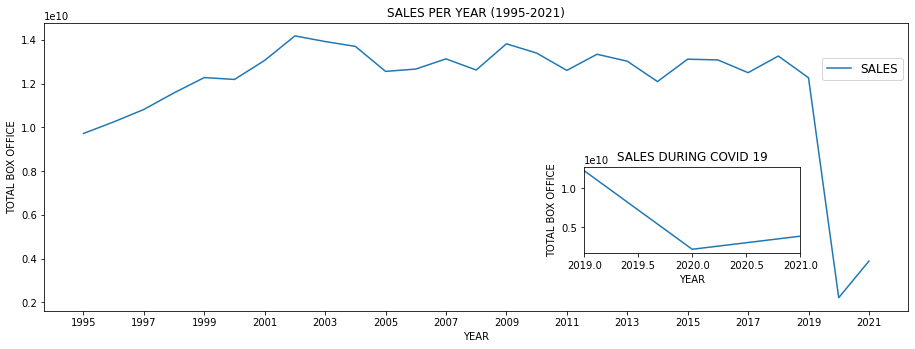

In [423]:
plot_data = df.loc[df['YEAR']>=2019] #data used for small plot inside

#BASIC PLOTTING USING matplotlib

fig = plt.figure()
ax1 = fig.add_axes([0,0,2,1])
ax2 = fig.add_axes([1.25,0.2,0.50,0.30])

ax1.plot(df['YEAR'],df['TOTAL INFLATION ADJUSTED BOX OFFICE'])
ax1.legend(["SALES"],loc=(0.9,0.8),fontsize=12)
ax1.set_ylabel('TOTAL BOX OFFICE')
ax1.set_xlabel('YEAR')
ax1.set_xticks(df['YEAR'][::2])
ax1.set_title('SALES PER YEAR (1995-2021)')

ax2.plot(plot_data['YEAR'],plot_data['TOTAL INFLATION ADJUSTED BOX OFFICE'])
ax2.set_xlim(2019,2021,0.5)
ax2.set_xlabel('YEAR')
ax2.set_ylabel('TOTAL BOX OFFICE')
ax2.set_title('SALES DURING COVID 19')

Observation :
* The movie industry sales has improved from 1995 
* We can find that sales dropped drastically in 2020 and then tends to be slowly improving in 2021 (This is due to the covid pandemic in 2020). 

Is There a relationship between tickets sold and Ticket price?

<AxesSubplot:title={'center':'Tickets sold to Ticket price comparison'}, xlabel='TICKETS SOLD', ylabel='TICKET PRICE'>

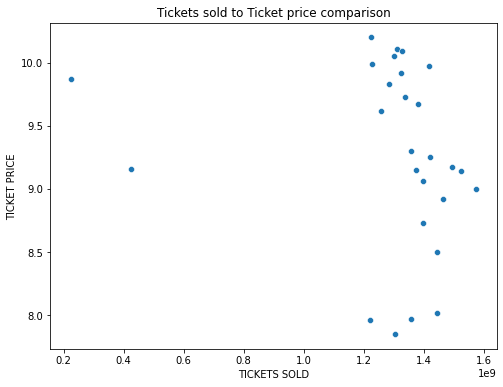

In [442]:
plt.figure(figsize=(8,6))
plt.title("Tickets sold to Ticket price comparison")
plt.ylabel("TICKET PRICE")
sns.scatterplot(x="TICKETS SOLD",y="AVERAGE TICKET PRICE INFLATION ADJUSTED",data=df)

Observation :

* The 2 Outliers found in the plot is from 2020 and 2021 having the least amount of tickets sold due to covid pandemic.
* Number of Tickets sold are generally between 1.2 and 1.5 billion.
* The most tickets are sold in price range between 8.5 and 9.5 dollars and does show potential of selling more tickets at this price.
* There only few years when tickets have been sold for less than 8.5 dollars and sold decent amount of tickets. However all of them mostly belong in the 90's era when box office sales was only picking up as we saw earlier.